In [87]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Load expression subtype data
expression_subtype = pd.read_csv("/data/GBM-subtype.tsv", sep="\t", index_col=0)

# Load expression data, skipping the row with headers
expression_data = pd.read_csv("/data/data.txt", sep="\t", skiprows=[1], index_col=0)
# Transpose the expression data so that patient IDs become row indices
expression_data = expression_data.T
expression_data.index = expression_data.index.str.split('-').str[:3].str.join('-')
expression_data

Hybridization REF,?|100130426,?|100133144,?|100134869,?|10357,?|10431,?|136542,?|155060,?|26823,?|280660,?|317712,...,DIS3|22894,DISC1|27185,DISC2|27184,DISP1|84976,DISP2|85455,DIXDC1|85458,DKC1|1736,DKFZP434H168|26077,DKFZP434K028|26070,DKFZP434L187|26082
TCGA-02-0047,0.0,3.0732,6.7611,54.7036,886.3210,0.0,232.9512,0.0000,0.0,0.0,...,751.9838,891.8467,0.6208,358.9539,151.8178,701.3123,751.7133,3.6879,1.2293,7.0254
TCGA-02-0055,0.0,0.0000,15.6973,31.3945,885.7744,0.0,162.0182,0.5606,0.0,0.0,...,712.8858,118.8507,0.0000,270.2172,44.2887,1591.0301,1187.9467,0.5606,0.0000,3.6889
TCGA-02-2483,0.0,2.9467,13.9398,60.3441,1234.8285,0.0,135.0923,0.0000,0.0,0.0,...,786.8032,423.8438,0.8485,303.1135,161.6887,565.2770,2334.5646,4.2216,0.4222,0.0000
TCGA-02-2485,0.0,15.9952,14.9571,91.8238,470.0000,0.0,417.6190,1.9048,0.0,0.0,...,858.6952,488.6095,0.4810,231.4286,482.3810,430.4762,1382.3810,0.9524,0.0000,16.7190
TCGA-02-2486,0.0,5.5610,4.8049,62.5366,546.3415,0.0,276.2195,0.0000,0.0,0.0,...,773.3476,196.6707,0.6098,223.1707,54.2683,890.2439,926.8293,0.0000,0.0000,3.8659
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-76-4927,0.0,2.4096,6.4257,43.0201,620.8835,0.0,168.6747,0.8032,0.0,0.0,...,795.9839,432.1285,0.0000,352.6104,248.9960,635.3414,1180.7229,0.0000,0.8032,NaN
TCGA-76-4928,0.0,10.1709,6.4812,42.4584,533.7423,0.0,193.2515,0.4382,0.0,0.0,...,824.6538,336.1613,0.4382,286.1525,46.8887,553.9001,1154.2507,0.4382,0.4382,NaN
TCGA-76-4929,0.0,8.4757,3.2496,62.2278,668.9001,0.0,329.9832,0.5583,0.0,0.0,...,515.2987,278.6153,0.0000,450.0279,437.7443,820.2122,1370.7426,5.5835,0.0000,NaN
TCGA-76-4931,0.0,6.1600,7.9576,58.8188,458.3529,0.0,849.4118,0.4706,0.0,0.0,...,896.2118,439.3929,0.9412,213.6471,369.4118,362.3529,1237.6471,0.9412,0.0000,NaN


In [88]:

# Impute missing values (replace NaN with zeros)
expression_data = expression_data.fillna(0)

# Clean patient IDs by stripping whitespace and converting to uppercase
expression_subtype.index = expression_subtype.index.str.strip().str.upper()
expression_data.index = expression_data.index.str.strip().str.upper()
expression_data

Hybridization REF,?|100130426,?|100133144,?|100134869,?|10357,?|10431,?|136542,?|155060,?|26823,?|280660,?|317712,...,DIS3|22894,DISC1|27185,DISC2|27184,DISP1|84976,DISP2|85455,DIXDC1|85458,DKC1|1736,DKFZP434H168|26077,DKFZP434K028|26070,DKFZP434L187|26082
TCGA-02-0047,0.0,3.0732,6.7611,54.7036,886.3210,0.0,232.9512,0.0000,0.0,0.0,...,751.9838,891.8467,0.6208,358.9539,151.8178,701.3123,751.7133,3.6879,1.2293,7.0254
TCGA-02-0055,0.0,0.0000,15.6973,31.3945,885.7744,0.0,162.0182,0.5606,0.0,0.0,...,712.8858,118.8507,0.0000,270.2172,44.2887,1591.0301,1187.9467,0.5606,0.0000,3.6889
TCGA-02-2483,0.0,2.9467,13.9398,60.3441,1234.8285,0.0,135.0923,0.0000,0.0,0.0,...,786.8032,423.8438,0.8485,303.1135,161.6887,565.2770,2334.5646,4.2216,0.4222,0.0000
TCGA-02-2485,0.0,15.9952,14.9571,91.8238,470.0000,0.0,417.6190,1.9048,0.0,0.0,...,858.6952,488.6095,0.4810,231.4286,482.3810,430.4762,1382.3810,0.9524,0.0000,16.7190
TCGA-02-2486,0.0,5.5610,4.8049,62.5366,546.3415,0.0,276.2195,0.0000,0.0,0.0,...,773.3476,196.6707,0.6098,223.1707,54.2683,890.2439,926.8293,0.0000,0.0000,3.8659
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-76-4927,0.0,2.4096,6.4257,43.0201,620.8835,0.0,168.6747,0.8032,0.0,0.0,...,795.9839,432.1285,0.0000,352.6104,248.9960,635.3414,1180.7229,0.0000,0.8032,0.0000
TCGA-76-4928,0.0,10.1709,6.4812,42.4584,533.7423,0.0,193.2515,0.4382,0.0,0.0,...,824.6538,336.1613,0.4382,286.1525,46.8887,553.9001,1154.2507,0.4382,0.4382,0.0000
TCGA-76-4929,0.0,8.4757,3.2496,62.2278,668.9001,0.0,329.9832,0.5583,0.0,0.0,...,515.2987,278.6153,0.0000,450.0279,437.7443,820.2122,1370.7426,5.5835,0.0000,0.0000
TCGA-76-4931,0.0,6.1600,7.9576,58.8188,458.3529,0.0,849.4118,0.4706,0.0,0.0,...,896.2118,439.3929,0.9412,213.6471,369.4118,362.3529,1237.6471,0.9412,0.0000,0.0000


In [89]:
expression_data.isna().sum()

Hybridization REF
?|100130426           0
?|100133144           0
?|100134869           0
?|10357               0
?|10431               0
                     ..
DIXDC1|85458          0
DKC1|1736             0
DKFZP434H168|26077    0
DKFZP434K028|26070    0
DKFZP434L187|26082    0
Length: 4971, dtype: int64

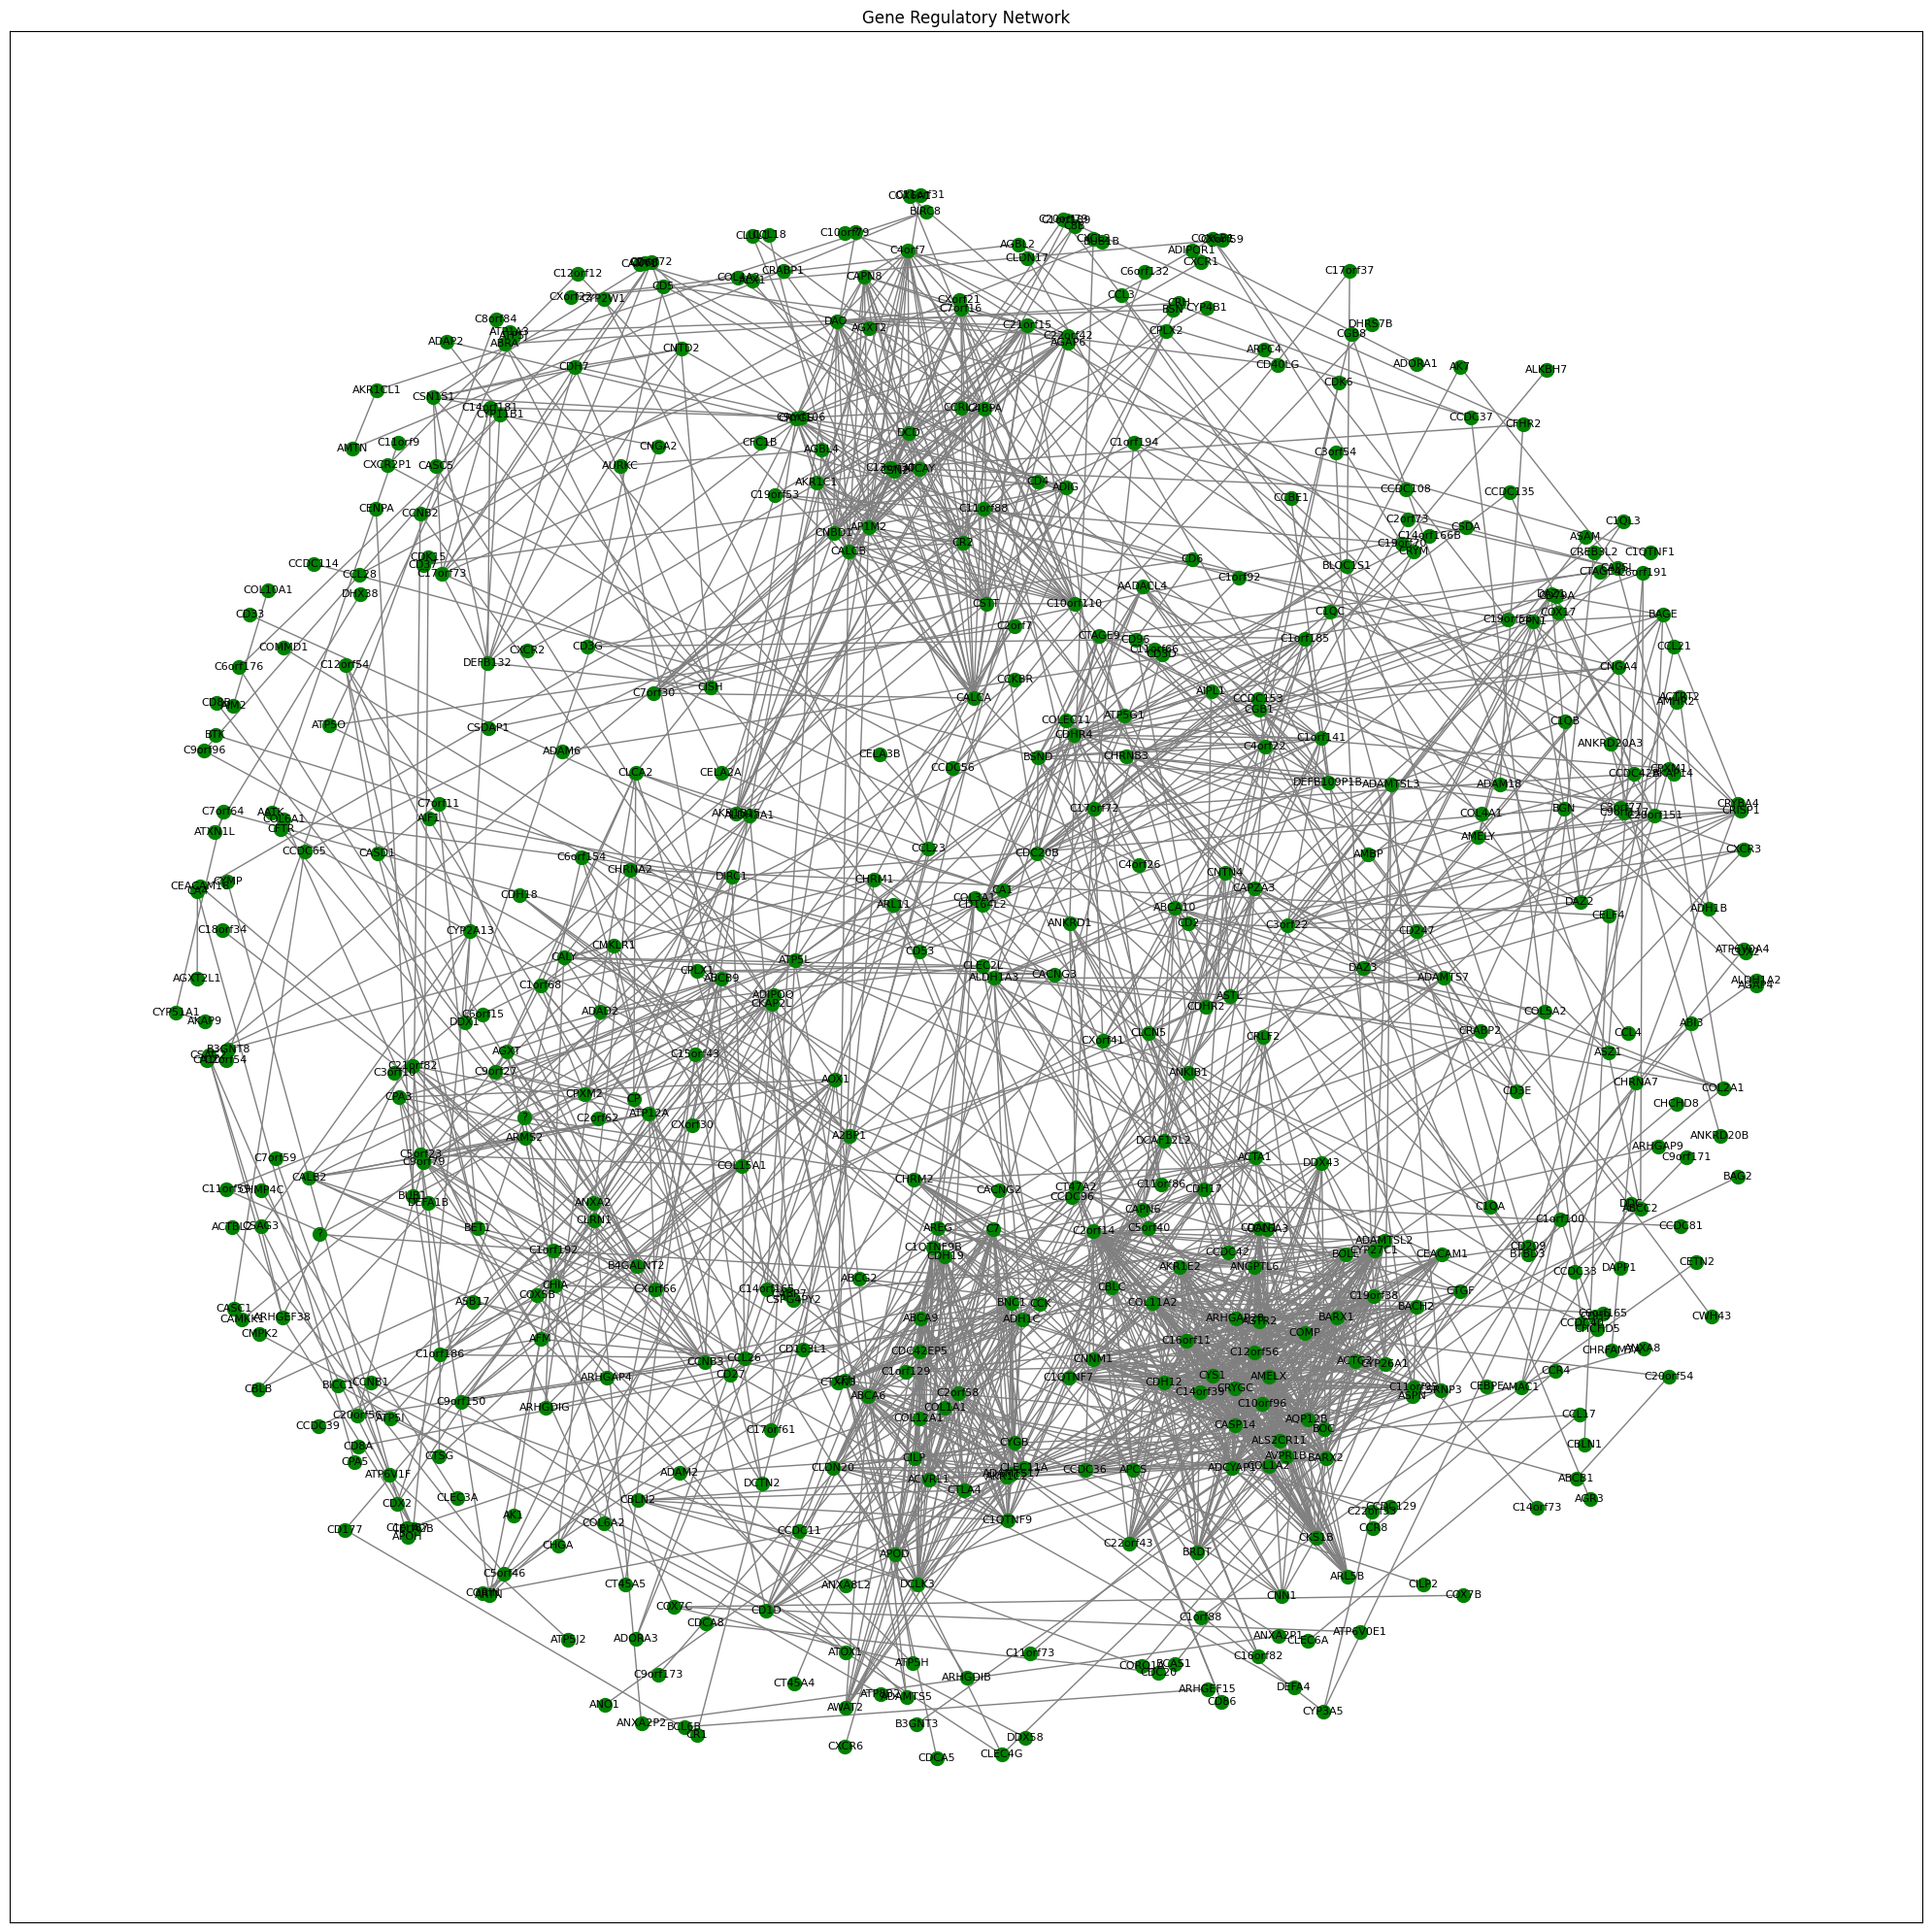

In [81]:
# Extract mesenchymal patient IDs from the subtype data
mesenchymal_patients = expression_subtype[expression_subtype['EXPRESSION_SUBTYPE'] == "Mesenchymal"].index

# Ensure patient IDs are present in both dataframes
common_patients = set(mesenchymal_patients).intersection(expression_data.index)
mesenchymal_expression_data = expression_data.loc[common_patients]

# Calculate gene co-expression correlations
correlation_matrix = mesenchymal_expression_data.corr()

# Drop rows and columns with all NaN values
correlation_matrix = correlation_matrix.dropna(axis=0, how='all')
correlation_matrix = correlation_matrix.dropna(axis=1, how='all')

# Create a networkx graph using the correlation matrix
G = nx.Graph()
correlation_threshold = 0.9  # Adjust this threshold as needed

for gene1 in correlation_matrix.columns:
    for gene2 in correlation_matrix.columns:
        if gene1 != gene2:
            correlation = correlation_matrix.loc[gene1, gene2]
            if abs(correlation) > correlation_threshold:
                G.add_edge(gene1, gene2, weight=correlation)

# Filter out edges with negative weights
positive_edges = [(gene1, gene2) for gene1, gene2, weight in G.edges(data="weight") if weight > 0]
positive_G = G.edge_subgraph(positive_edges).copy()

# Identify highly connected genes as potential regulators
def get_hubs_grn(graph, threshold):
    max_degree = max(dict(graph.degree()).values())
    hub_genes = [gene for gene, degree in graph.degree() if degree >= max_degree * threshold]
    return hub_genes

threshold = 2  # Adjust this threshold as needed
hub_genes = get_hubs_grn(positive_G, threshold)
print("Highly connected genes:")
print(", ".join(hub_genes))
plt.figure(figsize=(20, 20))
# Calculate degree centrality for each node
degree_centrality = nx.degree_centrality(positive_G)

# Calculate positions with nodes of higher degree centrality placed farther away using spring_layout
pos = nx.spring_layout(positive_G, seed=42 ,k=0.5)

# Draw nodes
nx.draw_networkx_nodes(positive_G, pos, nodelist=set(positive_G.nodes) - set(hub_genes), node_size=100, node_color='green', node_shape='o')

# Draw edges
nx.draw_networkx_edges(positive_G, pos, edge_color='gray', alpha=1)

# Draw labels
labels = {node: node.split('|')[0] for node in positive_G.nodes}
nx.draw_networkx_labels(positive_G, pos, labels, font_size=8)

plt.title("Gene Regulatory Network")
plt.tight_layout()
plt.show()







